In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [6]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /Users/chris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/chris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Part I: Data Preparation

In [7]:
df = pd.read_json("fashion_products_dataset.json")
print(df.shape)
df.head()

(28080, 17)


,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Women Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


### 1. Preprocessing

As a first step, you must pre-process the documents. In particular, for the text fields (title,
description) you should:

- Removing stop words
- Tokenization
- Removing punctuation marks
- Stemming
- and... anything else you think it's needed (bonus point)

In [8]:
def build_terms(line):
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))
    
    line = re.sub(r"[^a-zA-Z0-9\s\-x]", " ", line) # removing punctuation and digits
    line = line.lower() # transform in lowercase
    line = line.split() # tokenization
    line = [w for w in line if w not in stop_words] # remove stop words
    line = [stemmer.stem(w) for w in line] # stemming
    # extra: normalize accents and numbers

    return line

In [ ]:
df["title_clean"] = df["title"].apply(build_terms).str.join(" ") # apply to text fields
df["description_clean"] = df["description"].apply(build_terms).str.join(" ")

### 2. Select columns

Take into account that for future queries, the final output must return (when present) the
following information for each of the selected documents:
pid, title, description, brand, category, sub_category, product_details, seller, out_of_stock,
selling_price, discount, actual_price, average_rating, url.

In [10]:
keep = ["pid","title","description","brand","category","sub_category",
        "product_details","seller","out_of_stock","selling_price",
        "discount","actual_price","average_rating","url"]

df_sorted = df.reindex(columns=keep)

In [11]:
df_sorted.head()

,pid,title,description,brand,category,sub_category,product_details,seller,out_of_stock,selling_price,discount,actual_price,average_rating,url
0,TKPFCZ9EA7H5FYZH,Solid Women Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,False,921,69% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...
1,TKPFCZ9EJZV2UVRZ,Solid Men Blue Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,False,499,66% off,"1,499",3.9,https://www.flipkart.com/yorker-solid-men-blue...
2,TKPFCZ9EHFCY5Z4Y,Solid Men Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,False,931,68% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...
3,TKPFCZ9ESZZ7YWEF,Solid Women Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,False,911,69% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...
4,TKPFCZ9EVXKBSUD7,"Solid Women Brown, Grey Track Pants",Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,False,943,68% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-brow...


### 3. Categorical fields

Decide how to handle the fields category, sub_category, brand, product_details, and seller during pre-processing. Should they be merged into a single text field, indexed as separate fields in the inverted index or any other alternative? Justify your choice, considering how their distinctiveness may affect retrieval effectiveness. What are pros and cons of each approach?

Conservamos los campos nombrados por separado y procesados, y también un campo auxiliar `extra_field` que concatenan estos cinco para mejorar el resultado de las consultas.
La razón es porque entre los cinco campos no tienen el mismo peso por consulta, `sub_category` y `product_details` más relevantes que `seller`, o `brand` da una dimensión útil a la búsqueda por marca.

- En un solo campo: Juntar los campos en uno solo, de lo simple que es olvida la distinción entre palabras, dando el mismo peso a todas ellas.
- En campos separados: Mantenerlos por separado es más ordenado y permite dar un mayor contexto a las consultas según cada campo.

### 4. Numeric fields

Consider the fields out_of_stock, selling_price, discount, actual_price, and average_rating. Decide how these should be handled during pre-processing to use in further search. Should they be indexed as textual terms?

No indexamos los campos numéricos como texto. Estos cinco campos no aportan información semántica sobre el producto, sino cuantitativa, útiles para filtrar u ordenar los resultados. Durante el **pre-processing** se convierten a formato numérico o booleano, pero no se incluyen en el campo `extra_field` ni en el índice invertido.

In [12]:
for col in ["selling_price", "discount", "actual_price", "average_rating"]:
    df_sorted[col + "_num"] = pd.to_numeric(
        df_sorted[col].astype(str).str.replace(r"[^\d.]", "", regex=True)
    )

In [13]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28080 entries, 0 to 28079
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pid                 28080 non-null  object 
 1   title               28080 non-null  object 
 2   description         28080 non-null  object 
 3   brand               28080 non-null  object 
 4   category            28080 non-null  object 
 5   sub_category        28080 non-null  object 
 6   product_details     28080 non-null  object 
 7   seller              28080 non-null  object 
 8   out_of_stock        28080 non-null  bool   
 9   selling_price       28080 non-null  object 
 10  discount            28080 non-null  object 
 11  actual_price        28080 non-null  object 
 12  average_rating      28080 non-null  object 
 13  url                 28080 non-null  object 
 14  selling_price_num   28078 non-null  float64
 15  discount_num        27225 non-null  float64
 16  actu

# Part II: EDA

When working with data, it is important to have a better understanding of the content and some statistics. Provide an exploratory data analysis to describe the dataset you are working on in this project and explain the decisions made for the analysis. For example, word counting distribution, average sentence length, vocabulary size, ranking of products based on rating, price, discount, top sellers and brands, out_of_stock distribution, word clouds for the most frequent words, and entity recognition. Feel free to do the exploratory analysis and report your findings in the report.

In [14]:
num_cols = ["selling_price_num", "discount_num", "actual_price_num", "average_rating_num"]

In [15]:
len(df_sorted) # numnber of rows

28080

In [16]:
df_sorted[num_cols].describe().T # main statistics

,count,mean,std,min,25%,50%,75%,max
selling_price_num,28078.0,705.635088,549.681489,99.0,390.0,545.0,820.0,7999.0
discount_num,27225.0,50.256896,16.887287,1.0,40.0,53.0,63.0,87.0
actual_price_num,27303.0,1455.528110,939.977456,150.0,849.0,1199.0,1799.0,12999.0
average_rating_num,25819.0,3.627724,0.663429,1.0,3.2,3.8,4.1,5.0


In [17]:
df_sorted[num_cols].corr() # correlation

,selling_price_num,discount_num,actual_price_num,average_rating_num
selling_price_num,1.000000,-0.295486,0.847782,-0.007639
discount_num,-0.295486,1.000000,0.156480,-0.051480
actual_price_num,0.847782,0.156480,1.000000,-0.031853
average_rating_num,-0.007639,-0.051480,-0.031853,1.000000


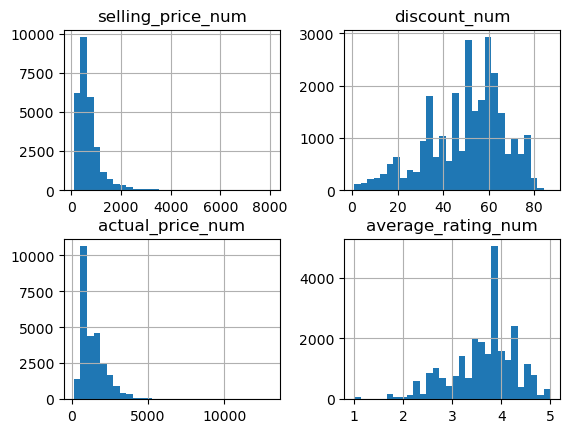

In [24]:
df_sorted[num_cols].hist(bins=30) # histogram
plt.show()

In [19]:
df["wc_title"] = df["title_clean"].str.split().str.len()
df["wc_description"]  = df["description_clean"].str.split().str.len()
df["wc_doc"] = (df["wc_title"] + df["wc_description"]).astype(int)

df[["wc_title", "wc_description", "wc_doc"]].describe().T

,count,mean,std,min,25%,50%,75%,max
wc_title,28080.0,6.249573,1.977769,1.0,5.0,6.0,7.0,31.0
wc_description,28080.0,18.707585,26.499277,0.0,0.0,9.0,29.0,566.0
wc_doc,28080.0,24.957158,26.864393,1.0,6.0,16.0,35.0,574.0


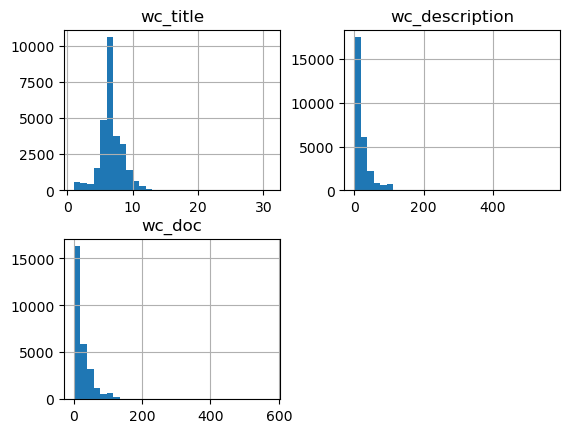

In [23]:
df[["wc_title", "wc_description", "wc_doc"]].hist(bins=30)
plt.show()